## wikipedia-api

In [4]:
import wikipediaapi as wa
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context("talk")
sns.set_palette('Set2', 10)

In [5]:
wiki = wa.Wikipedia('he')

In [6]:
zuk_he = wiki.page('מבצע_צוק_איתן')

In [7]:
def print_langlinks(page):
    langlinks = page.langlinks
    for k in sorted(langlinks.keys()):
        v = langlinks[k]
        print("%s: %s - %s: %s" % (k, v.language, v.title, v.fullurl))

print_langlinks(zuk_he)

ar: ar - الحرب على غزة 2014: https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%AD%D8%B1%D8%A8_%D8%B9%D9%84%D9%89_%D8%BA%D8%B2%D8%A9_2014
az: az - Qoruyucu Sərhəd əməliyyatı: https://az.wikipedia.org/wiki/Qoruyucu_S%C9%99rh%C9%99d_%C9%99m%C9%99liyyat%C4%B1
azb: azb - قورویوجو سرحد عملیاتی: https://azb.wikipedia.org/wiki/%D9%82%D9%88%D8%B1%D9%88%DB%8C%D9%88%D8%AC%D9%88_%D8%B3%D8%B1%D8%AD%D8%AF_%D8%B9%D9%85%D9%84%DB%8C%D8%A7%D8%AA%DB%8C
be-x-old: be-x-old - Апэрацыя «Непарушная скала»: https://be-x-old.wikipedia.org/wiki/%D0%90%D0%BF%D1%8D%D1%80%D0%B0%D1%86%D1%8B%D1%8F_%C2%AB%D0%9D%D0%B5%D0%BF%D0%B0%D1%80%D1%83%D1%88%D0%BD%D0%B0%D1%8F_%D1%81%D0%BA%D0%B0%D0%BB%D0%B0%C2%BB
bn: bn - ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ: https://bn.wikipedia.org/wiki/%E0%A7%A8%E0%A7%A6%E0%A7%A7%E0%A7%AA_%E0%A6%87%E0%A6%B8%E0%A6%B0%E0%A6%BE%E0%A6%AF%E0%A6%BC%E0%A7%87%E0%A6%B2%E0%A7%87%E0%A6%B0_%E0%A6%AB%E0%A6%BF%E0%A6%B2%E0%A6%BF%E0%A6%B8%E0%A7%8D%E0%A6%A4%E0%A6%BF%E0%A6%A8_%E0%A6%86%E0%A6%95%E0%A7%8D%E0%A6%B0%E0%A6%A

In [8]:
def print_sections(sections, level=0):
        for s in sections:
                print("%s: %s - %s" % ("*" * (level + 1), s.title, s.text[0:40]))
                print_sections(s.sections, level + 1)
#print_sections(zuk_he.sections)

In [9]:
zuk_he.links


{'+': + (id: ??, ns: 0),
 '11 באוגוסט': 11 באוגוסט (id: ??, ns: 0),
 '12 ביוני': 12 ביוני (id: ??, ns: 0),
 '13 ביוני': 13 ביוני (id: ??, ns: 0),
 '14 באוגוסט': 14 באוגוסט (id: ??, ns: 0),
 '14 ביולי': 14 ביולי (id: ??, ns: 0),
 '15 ביולי': 15 ביולי (id: ??, ns: 0),
 '16 באוגוסט': 16 באוגוסט (id: ??, ns: 0),
 '16 בספטמבר': 16 בספטמבר (id: ??, ns: 0),
 '17 ביולי': 17 ביולי (id: ??, ns: 0),
 '18 באוגוסט': 18 באוגוסט (id: ??, ns: 0),
 '18 ביולי': 18 ביולי (id: ??, ns: 0),
 '19 באוגוסט': 19 באוגוסט (id: ??, ns: 0),
 '19 ביולי': 19 ביולי (id: ??, ns: 0),
 '1 באוגוסט': 1 באוגוסט (id: ??, ns: 0),
 '2012': 2012 (id: ??, ns: 0),
 '2013': 2013 (id: ??, ns: 0),
 '2014': 2014 (id: ??, ns: 0),
 '2016': 2016 (id: ??, ns: 0),
 '2017': 2017 (id: ??, ns: 0),
 '20 ביולי': 20 ביולי (id: ??, ns: 0),
 '21 באוגוסט': 21 באוגוסט (id: ??, ns: 0),
 '21 ביולי': 21 ביולי (id: ??, ns: 0),
 '22 ביולי': 22 ביולי (id: ??, ns: 0),
 '23 באוגוסט': 23 באוגוסט (id: ??, ns: 0),
 '23 ביולי': 23 ביולי (id: ??, ns: 0),
 '24 ב

In [10]:
ll = zuk_he.langlinks
ll['he'] = ll['ar'].langlinks['he']

In [11]:
zuk_he.langlinks

{'ar': الحرب على غزة 2014 (id: 2172338, ns: 0),
 'az': Qoruyucu Sərhəd əməliyyatı (id: ??, ns: 0),
 'azb': قورویوجو سرحد عملیاتی (id: ??, ns: 0),
 'be-x-old': Апэрацыя «Непарушная скала» (id: ??, ns: 0),
 'bn': ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ (id: ??, ns: 0),
 'bs': Operacija "Zaštitni rub" (id: ??, ns: 0),
 'ca': Operació Marge Protector (id: ??, ns: 0),
 'cs': Operace Ochranné ostří (id: ??, ns: 0),
 'cy': Ymosodiad Israel ar Lain Gaza 2014 (id: ??, ns: 0),
 'de': Operation Protective Edge (id: ??, ns: 0),
 'diq': Ğeza sero operasyonê İsraili 2014 (id: ??, ns: 0),
 'el': Ισραηλινή Επίθεση στη Λωρίδα της Γάζας (2014) (id: ??, ns: 0),
 'en': 2014 Israel–Gaza conflict (id: ??, ns: 0),
 'eo': Operaco Ŝirma Marĝeno (id: ??, ns: 0),
 'es': Conflicto entre la Franja de Gaza e Israel de 2014 (id: ??, ns: 0),
 'eu': Hegi Babesgarria operazioa (2014) (id: ??, ns: 0),
 'fa': نبرد ۲۰۱۴ اسرائیل و غزه (id: ??, ns: 0),
 'fi': Operaatio Suojaava reuna (id: ??, ns: 0),
 'fr': Guerre de Gaza de 2014 

### Categories

In [12]:
zuk_he.categories

{'קטגוריה:2014 בישראל': קטגוריה:2014 בישראל (id: ??, ns: 14),
 'קטגוריה:דפים עם נקודות ציון בוויקינתונים': קטגוריה:דפים עם נקודות ציון בוויקינתונים (id: ??, ns: 14),
 'קטגוריה:דפים עם קישורים שבורים': קטגוריה:דפים עם קישורים שבורים (id: ??, ns: 14),
 "קטגוריה:הג'יהאד האסלאמי הפלסטיני": קטגוריה:הג'יהאד האסלאמי הפלסטיני (id: ??, ns: 14),
 'קטגוריה:ויקיפדיה: ערכים הדורשים מקורות': קטגוריה:ויקיפדיה: ערכים הדורשים מקורות (id: ??, ns: 14),
 'קטגוריה:חטיבת גבעתי: קרבות ומבצעים': קטגוריה:חטיבת גבעתי: קרבות ומבצעים (id: ??, ns: 14),
 'קטגוריה:חיל ההנדסה הקרבית: קרבות ומבצעים': קטגוריה:חיל ההנדסה הקרבית: קרבות ומבצעים (id: ??, ns: 14),
 'קטגוריה:חמאס': קטגוריה:חמאס (id: ??, ns: 14),
 'קטגוריה:מבצע צוק איתן': קטגוריה:מבצע צוק איתן (id: ??, ns: 14),
 'קטגוריה:ערכים עם קואורדינטות': קטגוריה:ערכים עם קואורדינטות (id: ??, ns: 14),
 'קטגוריה:צה"ל: מבצעים ברצועת עזה': קטגוריה:צה"ל: מבצעים ברצועת עזה (id: ??, ns: 14),
 'קטגוריה:קרבות חטיבת גולני ברצועת עזה': קטגוריה:קרבות חטיבת גולני ברצועת עזה (id: ??,

In [13]:
categories = {}
for k in sorted(ll.keys()):
    categories[k] = ll[k].categories


In [14]:
from collections import Counter
print({k: len(v) for k,v in  categories.items()})

{'ar': 38, 'az': 4, 'azb': 6, 'be-x-old': 4, 'bn': 9, 'bs': 5, 'ca': 7, 'cs': 7, 'cy': 6, 'de': 5, 'diq': 3, 'el': 5, 'en': 44, 'eo': 5, 'es': 10, 'eu': 10, 'fa': 24, 'fi': 3, 'fr': 33, 'gl': 2, 'he': 14, 'hr': 3, 'hu': 3, 'hy': 10, 'id': 21, 'it': 10, 'ja': 16, 'jv': 9, 'ka': 5, 'ko': 9, 'ms': 8, 'nl': 8, 'no': 7, 'pl': 3, 'pt': 7, 'ro': 6, 'ru': 13, 'sco': 8, 'sh': 4, 'si': 4, 'sr': 6, 'sv': 7, 'ta': 3, 'th': 4, 'tr': 11, 'uk': 5, 'ur': 12, 'vi': 3, 'zh': 19}


## Get External Links with WikiMedia REST extlinks

Use this: https://www.mediawiki.org/wiki/API:Query#Continuing_queries

In [15]:
import requests

In [18]:
flatten = lambda l: [item for sublist in l for item in sublist]


In [24]:
ext_links = {}

req = {'action': 'query',
       'prop': 'extlinks',
       'format': 'json',
       'ellimit': 'max',}

for k in sorted(ll.keys()):
    v = ll[k]
    params = req.copy()
    params['titles'] = v.title
    resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params = params).json()
    final_resp = [resp, ]
    while 'continue' in resp:
        params.update(resp['continue'])
        print (resp['continue'])
        #eloffset = resp['continue']['eloffset']
        resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params=params).json()
        final_resp.append(resp)
    ext_links[k] = final_resp

{'elcontinue': 'https://com.bbc.www./news/world-middle-east-28939350|390345740', 'continue': '||'}
{'elcontinue': 'https://ru.iz./news/573610|42809078', 'continue': '||'}


In [25]:
len(final_resp)

1

In [26]:
ext_links['en']

[{'continue': {'elcontinue': 'https://com.bbc.www./news/world-middle-east-28939350|390345740',
   'continue': '||'},
  'query': {'pages': {'43243199': {'pageid': 43243199,
     'ns': 0,
     'title': '2014 Israel–Gaza conflict',
     'extlinks': [{'*': 'http://www.businessinsider.com.au/hamas-rocket-arsenal-2014-7'},
      {'*': 'http://www.northernstar.com.au/news/hamas-using-human-shields-gazans-deny-claims/2325717/'},
      {'*': 'http://www.smh.com.au/it-pro/government-it/israeli-propaganda-war-hits-social-media-20140717-ztvky.html'},
      {'*': 'http://www.smh.com.au/world/gaza-ceasefire-gives-pause-to-assess-destruction-20140806-100ubq.html#ixzz39lGgu1Ch'},
      {'*': 'http://www.smh.com.au/world/gaza-team-defuses-live-bombs-and-shells-without-protective-suits-20140808-101qme.html'},
      {'*': 'http://www.smh.com.au/world/thousands-of-gaza-civilians-flee-ignoring-hamas-advice-to-stay-20140714-zt6cs.html'},
      {'*': 'http://www.theaustralian.com.au/opinion/trapped-in-gaza-h

In [27]:
from collections import defaultdict

clean_links = defaultdict(list)
for lang in ext_links:
    for resp in ext_links[lang]:
        for page in resp['query']['pages']:
            if 'extlinks' in resp['query']['pages'][page]:
                links = resp['query']['pages'][page]['extlinks']
                num = len(links)
                clean_links[lang].extend(flatten([list(l.values()) for l in links]))
            else: 
                clean_links[lang].extend([])
                num=0
                
            title = resp['query']['pages'][page]['title']

            print(f'{lang}: extlinks={num}, title: {title}')

ar: extlinks=405, title: الحرب على غزة 2014
az: extlinks=11, title: Qoruyucu Sərhəd əməliyyatı
azb: extlinks=4, title: قورویوجو سرحد عملیاتی
be-x-old: extlinks=45, title: Апэрацыя «Непарушная скала»
bn: extlinks=20, title: ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ
bs: extlinks=67, title: Operacija "Zaštitni rub"
ca: extlinks=94, title: Operació Marge Protector
cs: extlinks=31, title: Operace Ochranné ostří
cy: extlinks=59, title: Ymosodiad Israel ar Lain Gaza 2014
de: extlinks=281, title: Operation Protective Edge
diq: extlinks=2, title: Ğeza sero operasyonê İsraili 2014
el: extlinks=60, title: Ισραηλινή Επίθεση στη Λωρίδα της Γάζας (2014)
en: extlinks=500, title: 2014 Israel–Gaza conflict
en: extlinks=232, title: 2014 Israel–Gaza conflict
eo: extlinks=0, title: Operaco Ŝirma Marĝeno
es: extlinks=348, title: Conflicto entre la Franja de Gaza e Israel de 2014
eu: extlinks=87, title: Hegi Babesgarria operazioa (2014)
fa: extlinks=288, title: نبرد ۲۰۱۴ اسرائیل و غزه
fi: extlinks=68, title: Operaat

In [28]:
clean_links['en']

['http://www.businessinsider.com.au/hamas-rocket-arsenal-2014-7',
 'http://www.northernstar.com.au/news/hamas-using-human-shields-gazans-deny-claims/2325717/',
 'http://www.smh.com.au/it-pro/government-it/israeli-propaganda-war-hits-social-media-20140717-ztvky.html',
 'http://www.smh.com.au/world/gaza-ceasefire-gives-pause-to-assess-destruction-20140806-100ubq.html#ixzz39lGgu1Ch',
 'http://www.smh.com.au/world/gaza-team-defuses-live-bombs-and-shells-without-protective-suits-20140808-101qme.html',
 'http://www.smh.com.au/world/thousands-of-gaza-civilians-flee-ignoring-hamas-advice-to-stay-20140714-zt6cs.html',
 'http://www.theaustralian.com.au/opinion/trapped-in-gaza-how-hamas-punishes-reporters-for-the-truth/story-e6frg6zo-1227007768903',
 'http://www.cbc.ca/news/world/gaza-conflict-israel-hamas-both-committing-war-crimes-un-official-says-1.2723446',
 'http://globalnews.ca/news/1426608/mourning-military-strikes-after-israeli-teens-found-dead/',
 'http://globalnews.ca/news/1501568/israe

In [29]:
lc = Counter(flatten(l for l in clean_links.values()))
    

In [30]:
lc.most_common()

[('http://www.jpost.com/Operation-Protective-Edge/Videos-show-Lebanese-jihadi-group-active-in-Gaza-362355',
  20),
 ('http://www.jewishpress.com/news/breaking-news/idfs-operation-protective-edge-begins-against-gaza/2014/07/08/',
  19),
 ('http://m.aljazeera.com/story/2014730233016747143', 15),
 ('http://www.pchrgaza.org/portal/en/index.php?option=com_content&view=article&id=10491:statistics-victims-of-the-israeli-offensive-on-gaza-since-08-july-2014&catid=145:in-focus',
  15),
 ('http://www.theguardian.com/world/2014/jul/30/us-firm-condemnation-shelling-un-school-gaza',
  14),
 ('http://www.maannews.net/eng/ViewDetails.aspx?ID=711780', 13),
 ('http://www.middleeasteye.net/news/hamas-gains-credibility-fighting-force-analysts-say-371780262',
  13),
 ('http://america.aljazeera.com/articles/2014/7/7/israel-launched-deadlyairstrikesingaza.html',
  12),
 ('http://america.aljazeera.com/articles/2014/7/8/israeli-palestinianclashesupsettingisraelifaithinstatusquo.html',
  11),
 ('http://www.haa

## Content DataFrame

In [31]:
for_cdf = []
for lang in ll:
    page = ll[lang]
    for_cdf.append({'lang': lang, 'full_url': page.fullurl, 'title': page.title, 'summary': page.summary})
    
cdf = pd.DataFrame(for_cdf)
cdf.head()

,full_url,lang,summary,title
0,https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D8%...,ar,الحرب على غزة 2014 نزاع عسكري بين إسرائيل وحرك...,الحرب على غزة 2014
1,https://az.wikipedia.org/wiki/Qoruyucu_S%C9%99...,az,Qoruyucu Sərhəd əməliyyatı — 8 iyul 2014-cü il...,Qoruyucu Sərhəd əməliyyatı
2,https://azb.wikipedia.org/wiki/%D9%82%D9%88%D8...,azb,,قورویوجو سرحد عملیاتی
3,https://be-x-old.wikipedia.org/wiki/%D0%90%D0%...,be-x-old,Апэрацыя «Непарушная скала» (па-габрэйску: מִב...,Апэрацыя «Непарушная скала»
4,https://bn.wikipedia.org/wiki/%E0%A7%A8%E0%A7%...,bn,২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ বা ইসরায়েলের...,২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ


In [32]:
cdf.to_csv('data/zuk_wiki_pages.csv', index=False)

## Link Graph

In [33]:
cl_for_df = []

for lang in clean_links:
    for link in clean_links[lang]:
        cl_for_df.append({'lang': lang, 'link': link})

ldf = pd.DataFrame(cl_for_df)
ldf.head()

,lang,link
0,ar,http://972mag.com/the-unfolding-lie-of-operati...
1,ar,http://fr.africatime.com/niger/articles/le-nig...
2,ar,http://akhbarelyom.com/news/newdetails/303978/...
3,ar,http://www.al-sharq.com/news/details/257855#.U...
4,ar,http://www.albawabhnews.com/679567


In [34]:
ldf.to_csv('data/lang_extlinks.csv', index=False)

In [35]:
ldf.lang.value_counts()

en          732
ru          503
ar          405
ja          355
es          348
he          301
fa          288
de          281
it          245
fr          205
nl          172
id          170
pt          124
zh           99
ca           94
hu           94
eu           87
no           78
fi           68
bs           67
pl           66
el           60
cy           59
tr           51
ms           51
be-x-old     45
ur           37
sh           35
jv           35
si           32
cs           31
th           29
sv           27
ko           21
bn           20
gl           16
sco          16
ta           12
az           11
ro           11
hr            9
sr            5
vi            4
azb           4
uk            4
ka            3
hy            3
diq           2
Name: lang, dtype: int64

In [36]:
g = nx.from_pandas_edgelist(ldf, 'lang', 'link', create_using=nx.DiGraph())

nx.write_gexf(g, 'data/extlinks.gexf')

## Names from WikiData

In [2]:
from wikidata.client import Client
client = Client()  # doctest: +SKIP
entity = client.get('Q17324420', load=True)
entity

<wikidata.entity.Entity Q17324420 '2014 Israel–Gaza conflict'>

In [3]:
entity.description

m'War fought between the Israel Defense Forces and the Hamas-governed Gaza Strip during 2014'

In [4]:
entity.data

{'aliases': {'en': [{'language': 'en', 'value': '2014 Gaza war'},
   {'language': 'en', 'value': 'Protective Edge'},
   {'language': 'en', 'value': 'operation Protective Edge'},
   {'language': 'en', 'value': '2014 Israel/Gaza war'}],
  'eo': [{'language': 'eo', 'value': 'Konflikto en Gaza Sektoro 2014'}],
  'fr': [{'language': 'fr', 'value': 'Guerre de Gaza de 2014'}],
  'he': [{'language': 'he', 'value': 'ההסלמה לאחר חטיפת שלושת הנערים'}],
  'ru': [{'language': 'ru', 'value': 'Нерушимая скала'},
   {'language': 'ru', 'value': 'операция «Несокрушимая скала»'},
   {'language': 'ru', 'value': 'Несокрушимая скала'}]},
 'claims': {'P10': [{'id': 'Q17324420$6e55c3da-4cf2-99b9-0faa-4134182042cb',
    'mainsnak': {'datatype': 'commonsMedia',
     'datavalue': {'type': 'string',
      'value': 'Channel2 - Operation Protective Edge.webm'},
     'property': 'P10',
     'snaktype': 'value'},
    'rank': 'normal',
    'type': 'statement'}],
  'P1120': [{'id': 'Q17324420$671d4dd7-43c3-278b-9975-a3

In [30]:
def get_claims_labels(entity, claim_id):
    members = []
    for member in entity.data['claims'][claim_id]:
        member_id = member['mainsnak']['datavalue']['value']['id'] 
        member_id_ent = client.get(member_id, load=True)
        members.append(member_id_ent.data['labels']['he']['value'])
    return members

instance_of = get_claims_labels(entity, 'P31') # ['מבצע צבאי', 'מלחמה']
member_of = get_claims_labels(entity, 'P361') # ['לחימה ברצועת עזה']
instance_of

['מבצע צבאי', 'מלחמה']

In [31]:

member_of

['לחימה ברצועת עזה']

In [5]:
entity.data['labels']

{'ar': {'language': 'ar', 'value': 'الحرب على غزة 2014'},
 'az': {'language': 'az', 'value': 'Qoruyucu Sərhəd əməliyyatı'},
 'azb': {'language': 'azb', 'value': 'قورویوجو سرحد عملیاتی'},
 'be-tarask': {'language': 'be-tarask',
  'value': 'Апэрацыя «Непарушная скала»'},
 'bn': {'language': 'bn', 'value': '২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ'},
 'bs': {'language': 'bs', 'value': 'Operacija "Zaštitni rub"'},
 'ca': {'language': 'ca', 'value': 'Operació Marge Protector'},
 'cs': {'language': 'cs', 'value': 'Operace Ochranné ostří'},
 'cy': {'language': 'cy', 'value': 'Ymosodiad Israel ar Lain Gaza 2014'},
 'de': {'language': 'de', 'value': 'Operation Protective Edge'},
 'de-ch': {'language': 'de-ch', 'value': 'Operation Protective Edge'},
 'diq': {'language': 'diq', 'value': 'Ğeza sero operasyonê İsraili 2014'},
 'el': {'language': 'el', 'value': 'Επίθεση στη Λωρίδα της Γάζας'},
 'en': {'language': 'en', 'value': '2014 Israel–Gaza conflict'},
 'en-ca': {'language': 'en-ca', 'value': 'Operatio

In [ ]:
labels = pd.DataFrame([{'lang': v['language'], 'label': v['value']} for k, v in entity.data['labels'].items()])
labels.head()    

In [42]:
labels.to_csv('data/wikidata_labels.csv', index=False)

In [43]:
entity.data['aliases']

{'he': [{'language': 'he', 'value': 'ההסלמה לאחר חטיפת שלושת הנערים'}],
 'en': [{'language': 'en', 'value': '2014 Gaza war'},
  {'language': 'en', 'value': 'Protective Edge'},
  {'language': 'en', 'value': 'operation Protective Edge'},
  {'language': 'en', 'value': '2014 Israel/Gaza war'}],
 'fr': [{'language': 'fr', 'value': 'Guerre de Gaza de 2014'}],
 'ru': [{'language': 'ru', 'value': 'Нерушимая скала'},
  {'language': 'ru', 'value': 'операция «Несокрушимая скала»'},
  {'language': 'ru', 'value': 'Несокрушимая скала'}],
 'eo': [{'language': 'eo', 'value': 'Konflikto en Gaza Sektoro 2014'}]}

In [44]:
flatten([[{'lang': v['language'], 'alias': v['value']} for v in l] for k, l in entity.data['aliases'].items()])

[{'lang': 'he', 'alias': 'ההסלמה לאחר חטיפת שלושת הנערים'},
 {'lang': 'en', 'alias': '2014 Gaza war'},
 {'lang': 'en', 'alias': 'Protective Edge'},
 {'lang': 'en', 'alias': 'operation Protective Edge'},
 {'lang': 'en', 'alias': '2014 Israel/Gaza war'},
 {'lang': 'fr', 'alias': 'Guerre de Gaza de 2014'},
 {'lang': 'ru', 'alias': 'Нерушимая скала'},
 {'lang': 'ru', 'alias': 'операция «Несокрушимая скала»'},
 {'lang': 'ru', 'alias': 'Несокрушимая скала'},
 {'lang': 'eo', 'alias': 'Konflikto en Gaza Sektoro 2014'}]

In [45]:
aliases = pd.DataFrame(flatten([[{'lang': v['language'], 'alias': v['value']} for v in l] for k, l in entity.data['aliases'].items()]))
aliases.head()

,alias,lang
0,ההסלמה לאחר חטיפת שלושת הנערים,he
1,2014 Gaza war,en
2,Protective Edge,en
3,operation Protective Edge,en
4,2014 Israel/Gaza war,en


In [46]:
aliases.to_csv('data/wikidata_aliases.csv', index=False)

## Revisions


In [47]:
revisions = {}

req = {'action': 'query',
       'prop': 'revisions',
       'format': 'json',
       'rvlimit': 'max',
       'rvprop': 'timestamp|user|comment|size|tags|flags|ids|roles',}

for k in sorted(ll.keys()):
    v = ll[k]
    params = req.copy()
    params['titles'] = v.title
    resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params = params).json()
    final_resp = [resp, ]
    while 'continue' in resp:
        params.update(resp['continue'])
        print (resp['continue'])
        #eloffset = resp['continue']['rvcontinue']
        resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params=params).json()
        final_resp.append(resp)
    revisions[k] = final_resp

{'rvcontinue': '20140710115949|13502090', 'continue': '||'}
{'rvcontinue': '20140803095643|132737118', 'continue': '||'}
{'rvcontinue': '20140717123214|132225870', 'continue': '||'}
{'rvcontinue': '20150504151437|660779353', 'continue': '||'}
{'rvcontinue': '20141110194936|633270927', 'continue': '||'}
{'rvcontinue': '20140918031701|626033129', 'continue': '||'}
{'rvcontinue': '20140901174229|623736550', 'continue': '||'}
{'rvcontinue': '20140821213125|622252027', 'continue': '||'}
{'rvcontinue': '20140811224332|620834320', 'continue': '||'}
{'rvcontinue': '20140805094750|619936461', 'continue': '||'}
{'rvcontinue': '20140731115950|619277947', 'continue': '||'}
{'rvcontinue': '20140726214546|618593311', 'continue': '||'}
{'rvcontinue': '20140722180527|618013417', 'continue': '||'}
{'rvcontinue': '20140719193732|617616881', 'continue': '||'}
{'rvcontinue': '20140716051503|617141511', 'continue': '||'}
{'rvcontinue': '20140712174406|616677198', 'continue': '||'}
{'rvcontinue': '201407100

In [48]:
revisions['he'][0]

{'continue': {'rvcontinue': '20150516093651|16959028', 'continue': '||'},
 'query': {'pages': {'1201545': {'pageid': 1201545,
    'ns': 0,
    'title': 'מבצע צוק איתן',
    'revisions': [{'revid': 24527074,
      'parentid': 24511716,
      'user': 'MathKnight',
      'timestamp': '2018-12-24T14:21:15Z',
      'size': 192732,
      'roles': ['main'],
      'comment': '/* אמצעי לחימה וכלי נשק שהוכנסו לזירה */',
      'tags': []},
     {'revid': 24511716,
      'parentid': 24389796,
      'user': 'DMY',
      'timestamp': '2018-12-21T21:43:52Z',
      'size': 192776,
      'roles': ['main'],
      'comment': '',
      'tags': []},
     {'revid': 24389796,
      'parentid': 24357197,
      'user': '77.124.53.186',
      'anon': '',
      'timestamp': '2018-11-30T12:53:33Z',
      'size': 192762,
      'roles': ['main'],
      'comment': '',
      'tags': ['mobile edit', 'mobile web edit']},
     {'revid': 24357197,
      'parentid': 24342956,
      'user': '46.19.86.242',
      'anon': ''

In [49]:
clean_revs = defaultdict(list)
for lang in revisions:
    for resp in revisions[lang]:
        for page in resp['query']['pages']:
            if 'revisions' in resp['query']['pages'][page]:
                revs = resp['query']['pages'][page]['revisions']
                num = len(revs)
                clean_revs[lang].extend(revs)
            else: 
                clean_revs[lang].extend([])
                num=0
                
            title = resp['query']['pages'][page]['title']

            print(f'{lang}: revs={num}, title: {title}')

ar: revs=500, title: الحرب على غزة 2014
ar: revs=80, title: الحرب على غزة 2014
az: revs=27, title: Qoruyucu Sərhəd əməliyyatı
azb: revs=4, title: قورویوجو سرحد عملیاتی
be-x-old: revs=15, title: Апэрацыя «Непарушная скала»
bn: revs=62, title: ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ
bs: revs=114, title: Operacija "Zaštitni rub"
ca: revs=103, title: Operació Marge Protector
cs: revs=129, title: Operace Ochranné ostří
cy: revs=59, title: Ymosodiad Israel ar Lain Gaza 2014
de: revs=500, title: Operation Protective Edge
de: revs=500, title: Operation Protective Edge
de: revs=109, title: Operation Protective Edge
diq: revs=9, title: Ğeza sero operasyonê İsraili 2014
el: revs=110, title: Ισραηλινή Επίθεση στη Λωρίδα της Γάζας (2014)
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza conflict
en: revs=500, title: 2014 Israel–Gaza

In [50]:
cr_for_df = []

for lang in clean_revs:
    for rev in clean_revs[lang]:
        tmp = rev.copy()
        tmp['lang'] = lang
        tmp['title'] = ll[lang].title
        tmp['tags'] = ','.join(rev['tags'])
        tmp['roles'] = ','.join(rev['roles'])
        cr_for_df.append(tmp)

rdf = (pd.DataFrame(cr_for_df)
       .assign(timestamp = lambda x: pd.to_datetime(x.timestamp))
      )

rdf.head()

,anon,comment,commenthidden,lang,minor,parentid,revid,roles,size,suppressed,tags,timestamp,title,user,userhidden
0,NaN,,NaN,ar,NaN,31574952,32253741,main,189971,NaN,,2018-12-22 06:23:03,الحرب على غزة 2014,سامي الرحيلي,NaN
1,NaN,بوت:إزالة الوصلات الحمراء من قسم انظر أيضا V2....,NaN,ar,,31574122,31574952,main,189973,NaN,,2018-11-17 12:06:49,الحرب على غزة 2014,JarBot,NaN
2,NaN,,NaN,ar,NaN,30710212,31574122,main,190080,NaN,visualeditor-wikitext,2018-11-17 10:33:30,الحرب على غزة 2014,أمين,NaN
3,NaN,بوت:الإبلاغ عن رابط معطوب أو مؤرشف V2.9,NaN,ar,,29671261,30710212,main,189741,NaN,,2018-09-25 00:45:20,الحرب على غزة 2014,JarBot,NaN
4,NaN,بوت:الإبلاغ عن رابط معطوب أو مؤرشف V2.7,NaN,ar,,28710550,29671261,main,189492,NaN,,2018-07-30 08:09:07,الحرب على غزة 2014,JarBot,NaN


In [51]:
rdf.to_csv('data/all_revisions_by_page_lang.csv', index=False)

In [52]:
rdf = pd.read_csv('data/all_revisions_by_page_lang.csv')

In [53]:
zuk_he.langlinks

{'ar': الحرب على غزة 2014 (id: 2172338, ns: 0),
 'az': Qoruyucu Sərhəd əməliyyatı (id: 369716, ns: 0),
 'azb': قورویوجو سرحد عملیاتی (id: 256139, ns: 0),
 'be-x-old': Апэрацыя «Непарушная скала» (id: 157962, ns: 0),
 'bn': ২০১৪ ইসরায়েলের ফিলিস্তিন আক্রমণ (id: 368592, ns: 0),
 'bs': Operacija "Zaštitni rub" (id: 361628, ns: 0),
 'ca': Operació Marge Protector (id: 1192352, ns: 0),
 'cs': Operace Ochranné ostří (id: 1011391, ns: 0),
 'cy': Ymosodiad Israel ar Lain Gaza 2014 (id: 137857, ns: 0),
 'de': Operation Protective Edge (id: 8309928, ns: 0),
 'diq': Ğeza sero operasyonê İsraili 2014 (id: 44327, ns: 0),
 'el': Ισραηλινή Επίθεση στη Λωρίδα της Γάζας (2014) (id: 371937, ns: 0),
 'en': 2014 Israel–Gaza conflict (id: 43243199, ns: 0),
 'eo': Operaco Ŝirma Marĝeno (id: 491793, ns: 0),
 'es': Conflicto entre la Franja de Gaza e Israel de 2014 (id: 6360518, ns: 0),
 'eu': Hegi Babesgarria operazioa (2014) (id: 528943, ns: 0),
 'fa': نبرد ۲۰۱۴ اسرائیل و غزه (id: 2560879, ns: 0),
 'fi': Op

In [54]:
creation_dates = rdf[rdf.timestamp==rdf.groupby('lang').timestamp.transform(min)][['lang', 'timestamp']].sort_values('timestamp')
creation_dates.sort_values('lang')

,lang,timestamp
579,ar,2014-07-06 16:40:39
606,az,2014-07-09 17:02:40
610,azb,2018-09-29 07:27:16
625,be-x-old,2014-07-19 07:26:16
687,bn,2014-07-11 18:53:05
801,bs,2014-07-14 18:43:13
904,ca,2014-07-08 23:00:10
1033,cs,2014-07-10 19:44:11
1092,cy,2014-07-12 18:01:37
2201,de,2014-07-08 09:47:42


In [79]:
creation_dates['timestamp'] = pd.to_datetime(creation_dates.timestamp)

In [55]:
creation_dates.to_csv('data/pages_creation_dates.csv', index=False)

In [56]:
rdf[rdf.lang=='hu']

,anon,comment,commenthidden,lang,minor,parentid,revid,roles,size,suppressed,tags,timestamp,title,user,userhidden
16270,NaN,5 forrás archiválása és 0 megjelölése halott l...,NaN,hu,NaN,19708988,20704894,main,44354,NaN,NaN,2018-11-22 06:41:56,„Erős szikla” hadművelet,InternetArchiveBot,NaN
16271,NaN,[[User:BinBot/munka/vegyes|Helyesírási javítás...,NaN,hu,NaN,19365560,19708988,main,43302,NaN,NaN,2018-03-06 16:57:45,„Erős szikla” hadművelet,BinBot,NaN
16272,NaN,NaN,NaN,hu,NaN,19322241,19365560,main,43303,NaN,NaN,2017-11-25 22:57:25,„Erős szikla” hadművelet,89.132.96.234,NaN
16273,NaN,infobox jav.,NaN,hu,NaN,19295959,19322241,main,43302,NaN,NaN,2017-11-09 19:09:36,„Erős szikla” hadművelet,Llz78,NaN
16274,NaN,NaN,NaN,hu,NaN,19197386,19295959,main,43332,NaN,visualeditor,2017-11-02 17:40:22,„Erős szikla” hadművelet,80.98.203.198,NaN
16275,NaN,NaN,NaN,hu,NaN,18938711,19197386,main,43337,NaN,NaN,2017-10-01 16:26:32,„Erős szikla” hadművelet,Pasztilla,NaN
16276,NaN,[[Kategória:Arabellenesség|Arabellenesség]] ka...,NaN,hu,NaN,18913934,18938711,main,43281,NaN,NaN,2017-07-21 09:21:37,„Erős szikla” hadművelet,Burumbátor,NaN
16277,NaN,NaN,NaN,hu,NaN,18485342,18913934,main,43312,NaN,visualeditor,2017-07-14 14:02:32,„Erős szikla” hadművelet,86.101.124.139,NaN
16278,NaN,/* A konfliktus hatása a gázai polgárokra */cl...,NaN,hu,NaN,17921895,18485342,main,43281,NaN,NaN,2017-02-26 23:07:09,„Erős szikla” hadművelet,Pegybot,NaN
16279,NaN,[[WP:SZÁM|A tizedes törtet magyarul vesszővel ...,NaN,hu,NaN,17819303,17921895,main,43282,NaN,NaN,2016-09-09 19:19:04,„Erős szikla” hadművelet,BinBot,NaN


### Revision Content

In [ ]:
rev_cont = {}

req = {'action': 'query',
       'prop': 'revisions',
       'format': 'json',
       'rvlimit': 'max',
       'rvprop': 'timestamp|user|comment|size|tags|content',}

#for k in sorted(ll.keys()):
for k in sorted(['he']):
    v = ll[k]
    params = req.copy()
    params['titles'] = v.title
    resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params = params).json()
    final_resp = [resp, ]
    while 'continue' in resp:
        params.update(resp['continue'])
        print (resp['continue'])
        #eloffset = resp['continue']['rvcontinue']
        resp = requests.get(f'https://{k}.wikipedia.org/w/api.php', params=params).json()
        final_resp.append(resp)
    rev_cont[k] = final_resp

In [ ]:
text = rev_cont['he'][0]['query']['pages']['1201545']['revisions'][0]['*']
text

### External link revisions

In [ ]:
from functools import wraps

def retry(times):

    def wrapper_fn(f):

        @wraps(f)
        def new_wrapper(*args,**kwargs):
            for i in range(times):
                try:
                    #print 'try %s' % (i + 1)
                    return f(*args,**kwargs)
                except Exception as e:
                    error = e
            raise error

        return new_wrapper

    return wrapper_fn


import concurrent.futures

@retry(3)
def get_rev_external_links(lang, revid):
    req = {'action': 'parse',
       'prop': 'externallinks',
       'format': 'json',
       'oldid': revid
      }
    params = req.copy()
    #params['title'] = title
    #params['text'] = title
    params['oldid'] = revid
        
    resp = requests.get(f'http://{lang}.wikipedia.org/w/api.php', params = params).json()
    return resp
rev_ext = defaultdict(list)

# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=30) as executor:
    # Start the load operations and mark each future with its URL
    future_to_parse = {executor.submit(get_rev_external_links, lang, revid): (lang, revid, timestamp) for idx, lang, title, revid, timestamp in rdf.loc[:, ['lang', 'title', 'revid', 'timestamp']].sort_values('timestamp').itertuples()}
    for future in concurrent.futures.as_completed(future_to_parse):
        lang, revid, timestamp = future_to_url[future]
        rev_ext[lang].append(future)


In [ ]:
for future in concurrent.futures.as_completed(future_to_parse):
    lang, revid, timestamp = future_to_parse[future]
    rev_ext[lang].append(future.result())

In [ ]:
rev_ext['he'][2]

In [58]:
import gzip, pickle


In [60]:
fp=gzip.open('data/revision_external_links.pkl','rb')
rev_ext = pickle.load(fp)

#### First revision for each link

In [61]:
sorted_rev_ext = {lang: sorted([rev for rev in revs if 'parse' in rev], key=lambda k: k['parse']['revid']) for lang, revs in rev_ext.items()} 

In [62]:
full_df = []
for lang in sorted_rev_ext:
    for resp in sorted_rev_ext[lang]:
        if 'parse' in resp:
            for link in resp['parse']['externallinks']:
                full_df.append({'lang': lang, 'link': link, 'revid': resp['parse']['revid']})
        
full_rev_link_df = pd.DataFrame(full_df)

In [63]:
frl = full_rev_link_df.merge(rdf[['lang', 'revid', 'timestamp']], how='left')

In [65]:
frl.head()

,lang,link,revid,timestamp
0,cy,http://www.jewishpress.com/news/breaking-news/...,1618173,2014-07-12 18:01:37
1,cy,http://www.bbc.co.uk/news/world-middle-east-28...,1618173,2014-07-12 18:01:37
2,cy,http://www.cbsnews.com/news/israel-ids-2-main-...,1618173,2014-07-12 18:01:37
3,cy,http://www.jpost.com/Operation-Brothers-Keeper...,1618173,2014-07-12 18:01:37
4,cy,http://www.bellinghamherald.com/2014/06/30/372...,1618173,2014-07-12 18:01:37


In [72]:
frl['timestamp'] = pd.to_datetime(frl.timestamp)

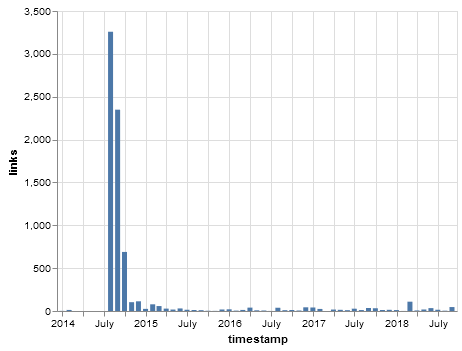

In [76]:
import altair as alt
alt.renderers.enable('notebook')

link_appear = frl.groupby('link').timestamp.min().to_frame().resample('M', on='timestamp').size().reset_index().rename(columns={0:'links'})

alt.Chart(link_appear).mark_bar().encode(
    x='timestamp:T',
    y='links:Q'
)

In [80]:
creation_dates_day = creation_dates.resample('D', on='timestamp').size().reset_index().rename(columns={0:'pages_created'})
creation_dates_day['pages'] = creation_dates_day.pages_created.cumsum()
creation_dates_day['pages_pct'] = creation_dates_day.pages / creation_dates_day.pages.max()

creation_dates_day

,timestamp,pages_created,pages,pages_pct
0,2013-12-30,1,1,0.020408
1,2013-12-31,0,1,0.020408
2,2014-01-01,0,1,0.020408
3,2014-01-02,0,1,0.020408
4,2014-01-03,0,1,0.020408
5,2014-01-04,0,1,0.020408
6,2014-01-05,0,1,0.020408
7,2014-01-06,0,1,0.020408
8,2014-01-07,0,1,0.020408
9,2014-01-08,0,1,0.020408


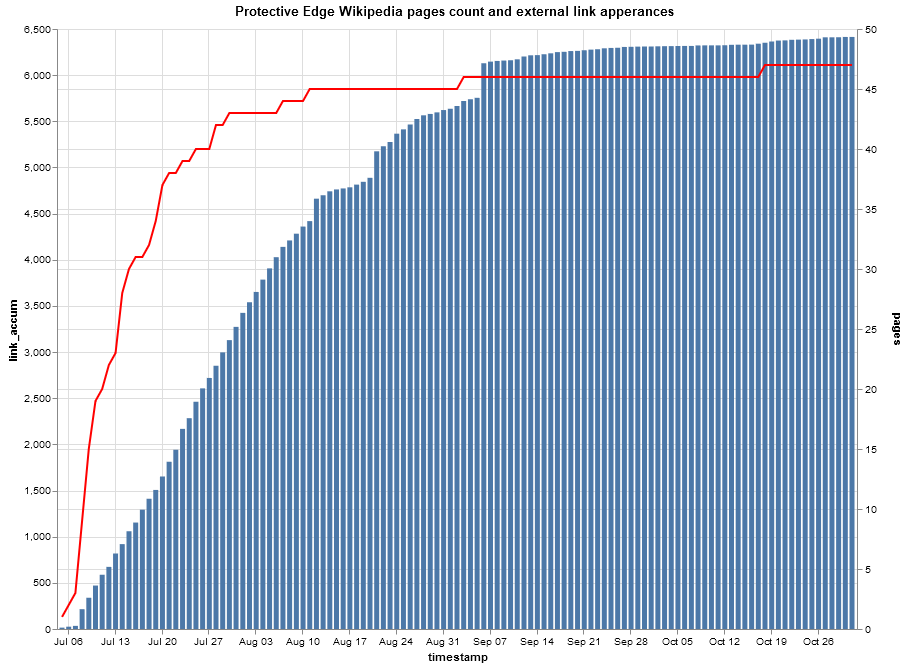

In [81]:
first_link_appear = frl.groupby('link').timestamp.min().to_frame().resample('D', on='timestamp').size().reset_index().rename(columns={0:'links'})
first_link_appear['link_accum'] = first_link_appear.links.cumsum()
first_link_appear['link_pct_change'] = first_link_appear.link_accum.pct_change()

bar = alt.Chart(first_link_appear[(first_link_appear.timestamp>='2014-07-05') & (first_link_appear.timestamp<'2014-11-01')]).mark_bar().encode(
    x='timestamp:T',
    y='link_accum:Q'
).properties(width=800, height=600)

line = alt.Chart(creation_dates_day[(creation_dates_day.timestamp>='2014-07-05') & (creation_dates_day.timestamp<'2014-11-01')]).mark_line(color='red').encode(
    x='timestamp:T',
    y='pages:Q'
).properties(width=800, height=600)

alt.layer(
    bar,
    line
).resolve_scale(
    y='independent'
).properties(title='Protective Edge Wikipedia pages count and external link apperances')

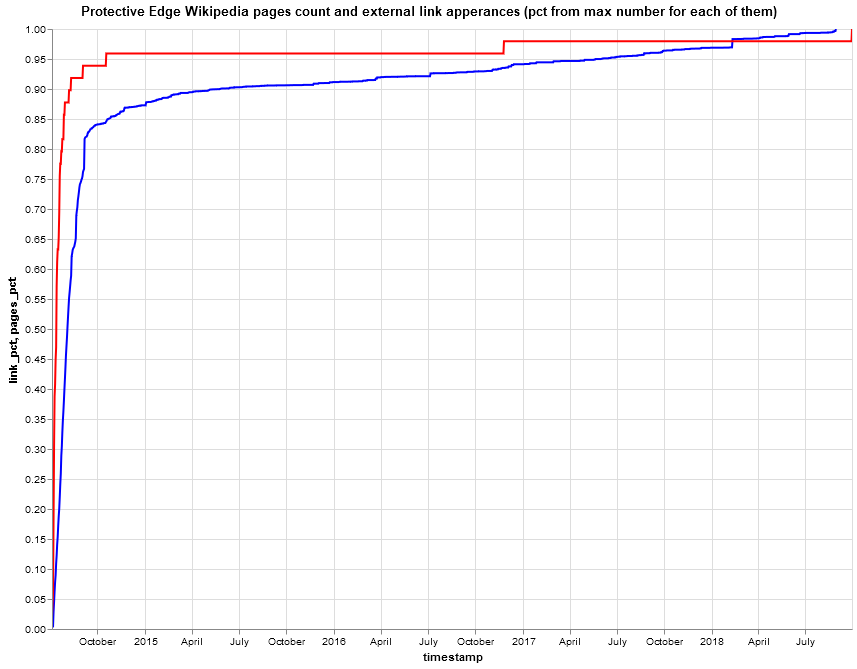

In [82]:
first_link_appear = frl.groupby('link').timestamp.min().to_frame().resample('D', on='timestamp').size().reset_index().rename(columns={0:'links'})
first_link_appear['link_accum'] = first_link_appear.links.cumsum()
first_link_appear['link_pct'] = first_link_appear.link_accum / first_link_appear.link_accum.max()


bar = alt.Chart(first_link_appear[(first_link_appear.timestamp>='2014-07-05') & (first_link_appear.timestamp<'2018-11-01')]).mark_line(color='blue').encode(
    x='timestamp:T',
    y='link_pct:Q',
    tooltip = 'timestamp'
).properties(width=800, height=600)

line = alt.Chart(creation_dates_day[(creation_dates_day.timestamp>='2014-07-05') & (creation_dates_day.timestamp<'2018-11-01')]).mark_line(color='red').encode(
    x='timestamp:T',
    y='pages_pct:Q',
    tooltip = 'timestamp'
).properties(width=800, height=600)

alt.layer(
    bar,
    line
).interactive().properties(title='Protective Edge Wikipedia pages count and external link apperances (pct from max number for each of them)')



In [83]:
(frl
 .groupby(['lang', 'link'])
 .timestamp.min()
 .reset_index()
 .sort_values(by=['lang', 'timestamp'], ascending=False)
 .to_csv('data/links_creation_date.csv', index=False))

In [84]:
(frl
 .groupby(['lang', 'link'])
 .timestamp.agg(['min', 'max'])
 .reset_index()
 .sort_values(by=['lang', 'min'], ascending=False)
)

,lang,link,min,max
10195,zh,https://web.archive.org/web/20150626164255/htt...,2018-08-22 13:21:14,2018-08-22 13:21:14
10190,zh,https://web.archive.org/web/20140727005451/htt...,2018-06-25 15:15:42,2018-08-22 13:21:14
10181,zh,https://archive.is/20140828023420/http://www.w...,2017-11-10 21:53:43,2018-08-22 13:21:14
10191,zh,https://web.archive.org/web/20140803200140/htt...,2017-11-10 21:53:43,2018-08-22 13:21:14
10192,zh,https://web.archive.org/web/20140808044248/htt...,2017-11-10 21:53:43,2018-08-22 13:21:14
10194,zh,https://web.archive.org/web/20140913014525/htt...,2017-11-10 21:53:43,2018-08-22 13:21:14
10196,zh,https://web.archive.org/web/20160305011850/htt...,2017-11-10 21:53:43,2018-08-22 13:21:14
10193,zh,https://web.archive.org/web/20140812224510/htt...,2017-06-08 04:17:20,2018-08-22 13:21:14
10057,zh,http://cn.rfi.fr/%E6%94%BF%E6%B2%BB/20140720-%...,2016-11-02 06:11:53,2018-08-22 13:21:14
10074,zh,http://nymag.com/daily/intelligencer/2014/07/h...,2015-07-26 12:54:26,2018-08-22 13:21:14


In [85]:
pd.set_option('display.max_colwidth', -1)
frl[frl.link.str.contains('archive.org')].drop_duplicates(subset=['lang', 'link'])

,lang,link,revid,timestamp
14199,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20871-he/Dover.aspx,15691799,2014-07-08 02:27:08
14539,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20877-he/Dover.aspx,15692278,2014-07-08 07:34:29
23232,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20889-he/Dover.aspx,15697787,2014-07-09 19:59:43
25226,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20896-he/Dover.aspx,15702544,2014-07-11 10:17:24
27937,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20909-he/Dover.aspx,15708720,2014-07-13 08:41:33
29285,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20905-he/Dover.aspx,15710889,2014-07-13 18:11:36
42228,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20931-he/Dover.aspx,15725345,2014-07-17 20:02:53
52698,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20941-he/Dover.aspx,15730077,2014-07-19 11:29:27
56200,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20949-he/Dover.aspx,15732107,2014-07-20 06:49:37
75313,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20973-he/Dover.aspx,15741166,2014-07-22 13:51:14


In [86]:
frl[frl.link.str.contains('Dover.aspx')].drop_duplicates(subset=['lang', 'link'])

,lang,link,revid,timestamp
14199,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20871-he/Dover.aspx,15691799,2014-07-08 02:27:08
14539,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20877-he/Dover.aspx,15692278,2014-07-08 07:34:29
23232,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20889-he/Dover.aspx,15697787,2014-07-09 19:59:43
25226,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20896-he/Dover.aspx,15702544,2014-07-11 10:17:24
26487,he,http://www.idf.il/1133-20896-HE/Dover.aspx,15705567,2014-07-12 10:36:06
27937,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20909-he/Dover.aspx,15708720,2014-07-13 08:41:33
29285,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20905-he/Dover.aspx,15710889,2014-07-13 18:11:36
30152,he,http://www.idf.il/1133-20909-HE/Dover.aspx,15713750,2014-07-14 16:09:52
42228,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20931-he/Dover.aspx,15725345,2014-07-17 20:02:53
52698,he,http://web.archive.org/web/20090626014827/http://www.idf.il/1133-20941-he/Dover.aspx,15730077,2014-07-19 11:29:27


## Provenance

1. Overall - in how many languages does it appear currently and in the past? First archival in web archive?
1. Overall and per lang:
   1. When was link first added
   1. Was it removed? When?
1. Did it come back after removal? How many times?
1. Anchor text changes?
1. Who added? Who removed? anonymous edits?
1. Bot edits?
1. Did the same user add to different languages?
1. Section changes in page? Did it change?
1. Number of referrals in page to the link?
1. Did it appear in discussions?
1. Did it appear in other wikipedia articles?
1. Carbon date it and compare to time added to wikipedia


In [162]:
top_link = frl.link.mode().iat[0]

def get_link_exists_df(df, link):
    keys = ['lang', 'revid', 'timestamp']
    link_exists = (df.groupby(keys).size()
                       .reset_index()
                       .drop(0, axis=1)
                       .merge(df[df.link==link], on=keys, how='left')
                       .assign(link = lambda x: x.link.notnull().astype(int))
                       .groupby(['timestamp', 'lang', 'link']).size().reset_index()
                       .pivot(index='timestamp', columns='lang', values='link')
                       .fillna(method='ffill').fillna(0).sort_index())
    return link_exists

top_link_exists = get_link_exists_df(frl, top_link)

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set(rc={'figure.figsize':(20,15)})

Text(0.5, 1.0, 'http://www.jpost.com/Operation-Protective-Edge/Videos-show-Lebanese-jihadi-group-active-in-Gaza-362355')

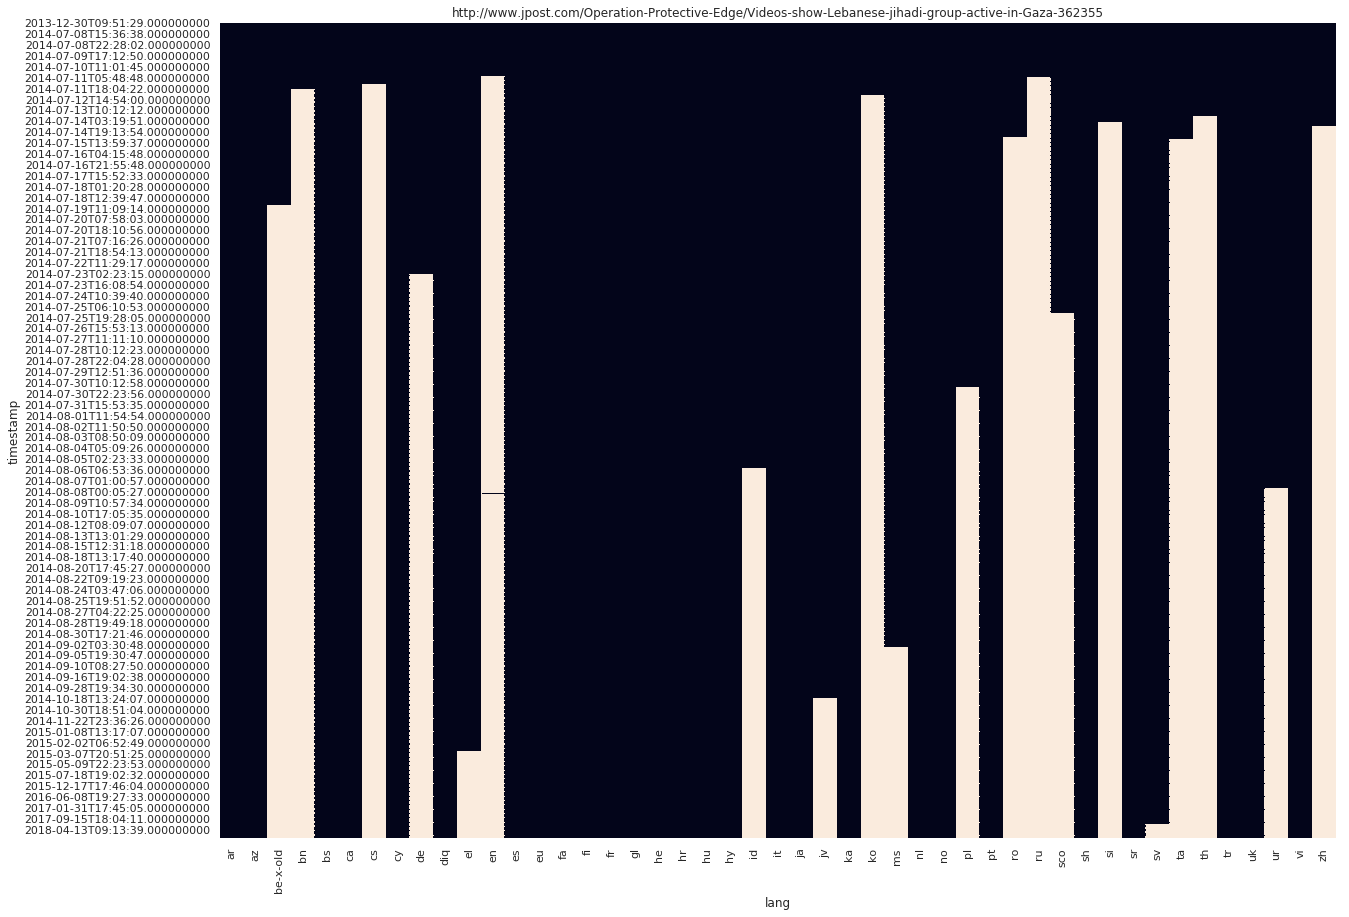

In [177]:
sns.heatmap(top_link_exists, cbar=False).set_title(top_link)

In [163]:
second_link_exists = get_link_exists_df(frl, frl.link.value_counts().index[1])

Text(0.5, 1.0, 'http://www.unrwa.org/newsroom/press-releases/unrwa-strongly-condemns-placement-rockets-school')

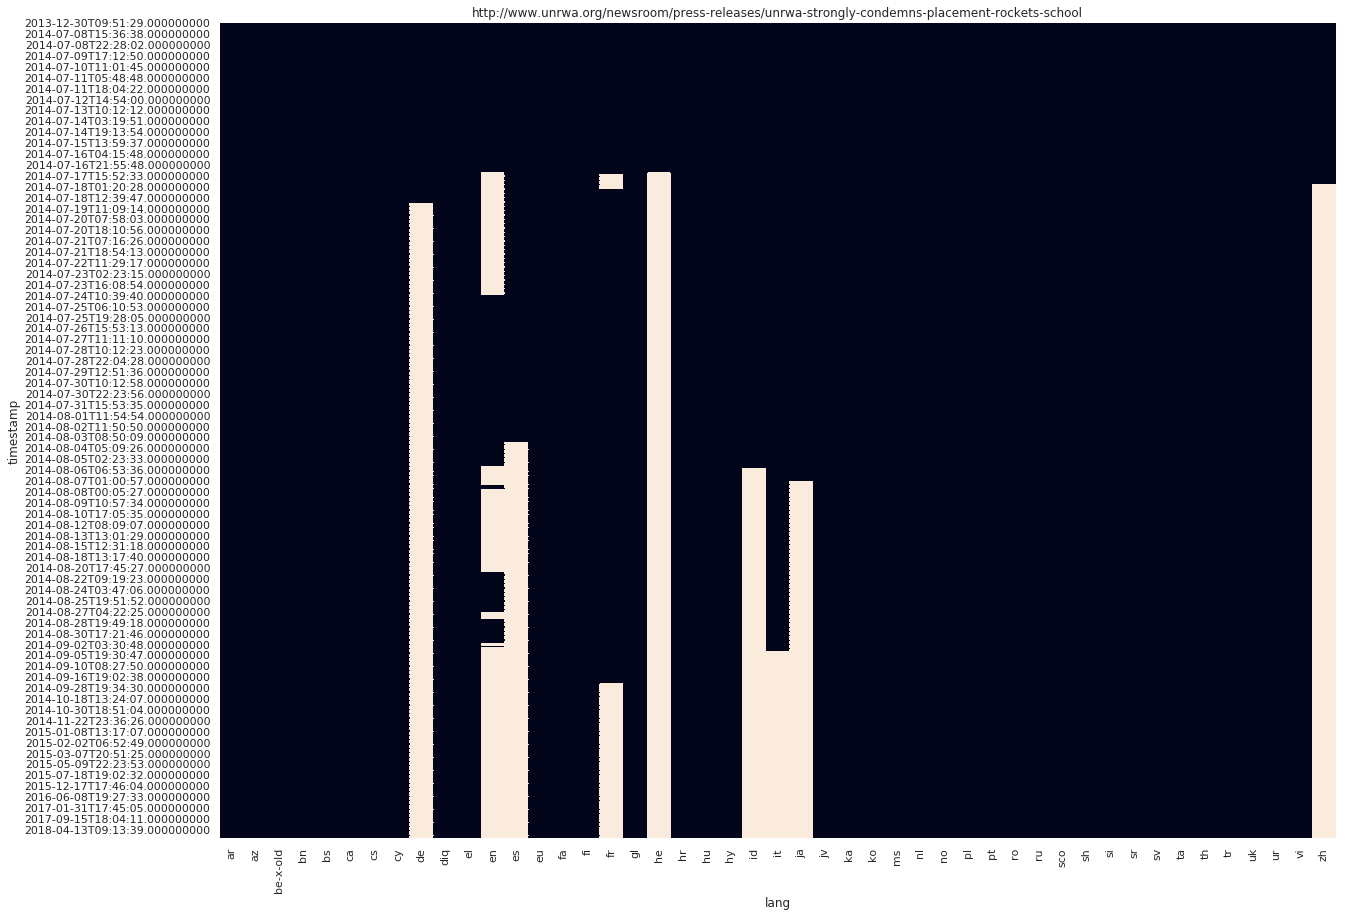

In [166]:
sns.heatmap(second_link_exists, cbar=False).set_title(frl.link.value_counts().index[1])

Text(0.5, 1.0, 'http://www.haaretz.com/news/diplomacy-defense/1.603472')

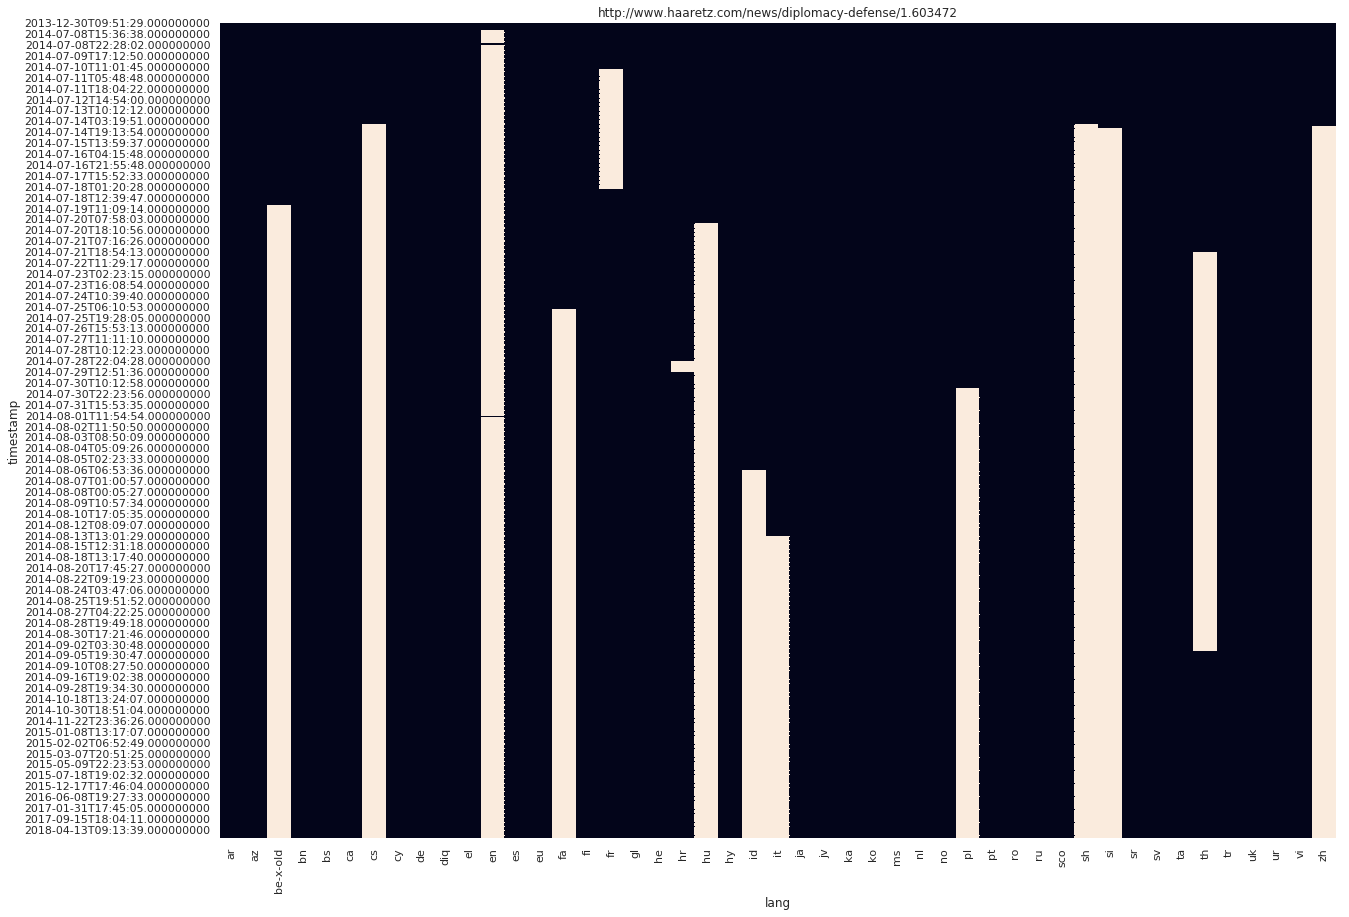

In [172]:
l = frl.link.value_counts().index[2]
sns.heatmap(get_link_exists_df(frl, frl.link.value_counts().index[2]), cbar=False).set_title(l)

Text(0.5, 1.0, 'http://america.aljazeera.com/articles/2014/7/7/israel-launched-deadlyairstrikesingaza.html')

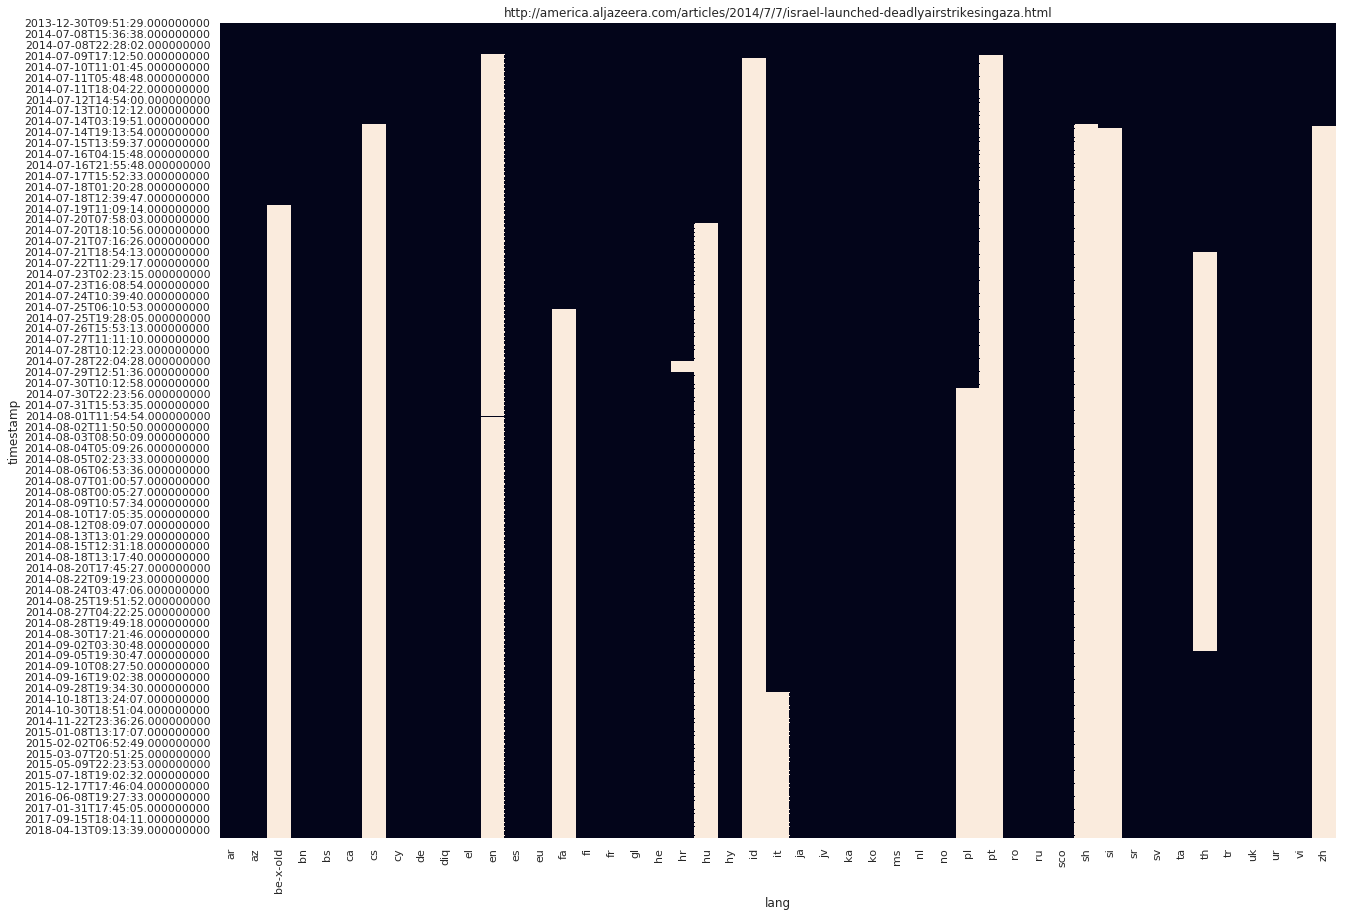

In [168]:
l = frl.link.value_counts().index[3]
sns.heatmap(get_link_exists_df(frl, l), cbar=False).set_title(l)

Text(0.5, 1.0, 'http://www.timesofisrael.com/israel-pounds-dozens-of-gaza-targets-in-major-counteroffensive')

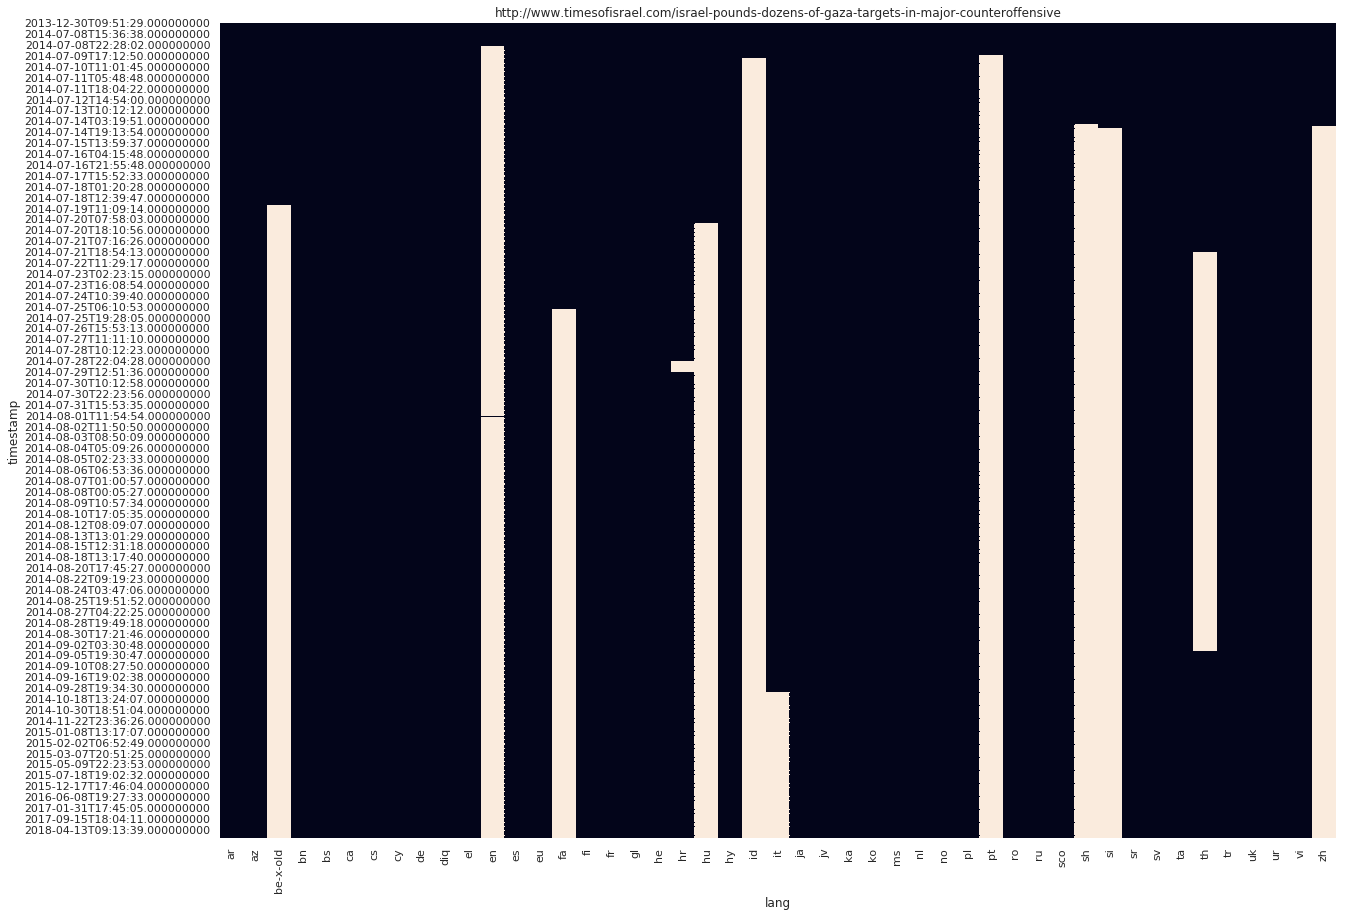

In [169]:
l = frl.link.value_counts().index[4]
sns.heatmap(get_link_exists_df(frl, l), cbar=False).set_title(l)

Text(0.5, 1.0, 'http://america.aljazeera.com/articles/2014/7/8/israeli-palestinianclashesupsettingisraelifaithinstatusquo.html')

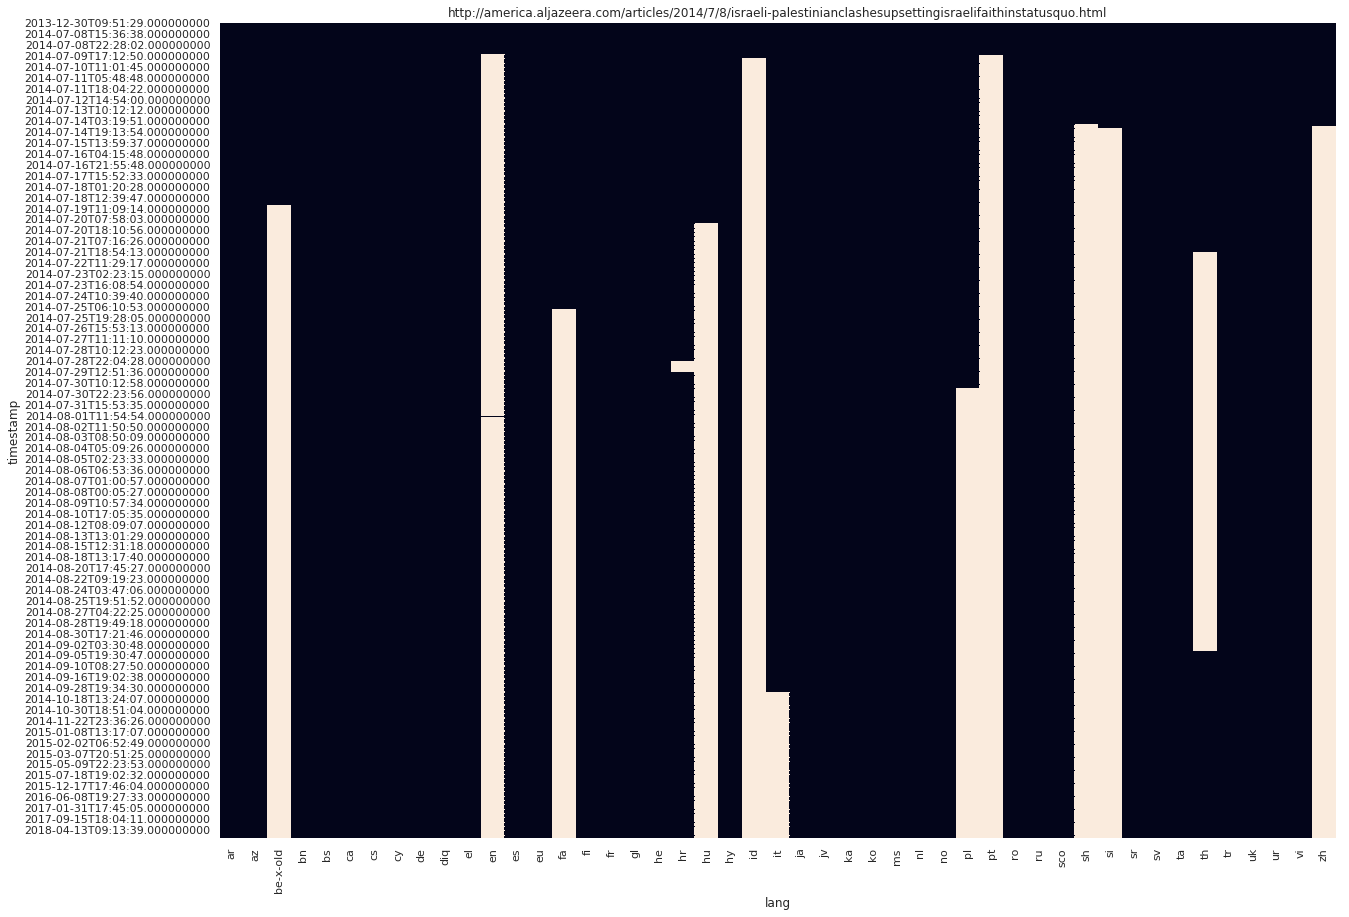

In [170]:
l = frl.link.value_counts().index[5]
sns.heatmap(get_link_exists_df(frl, l), cbar=False).set_title(l)

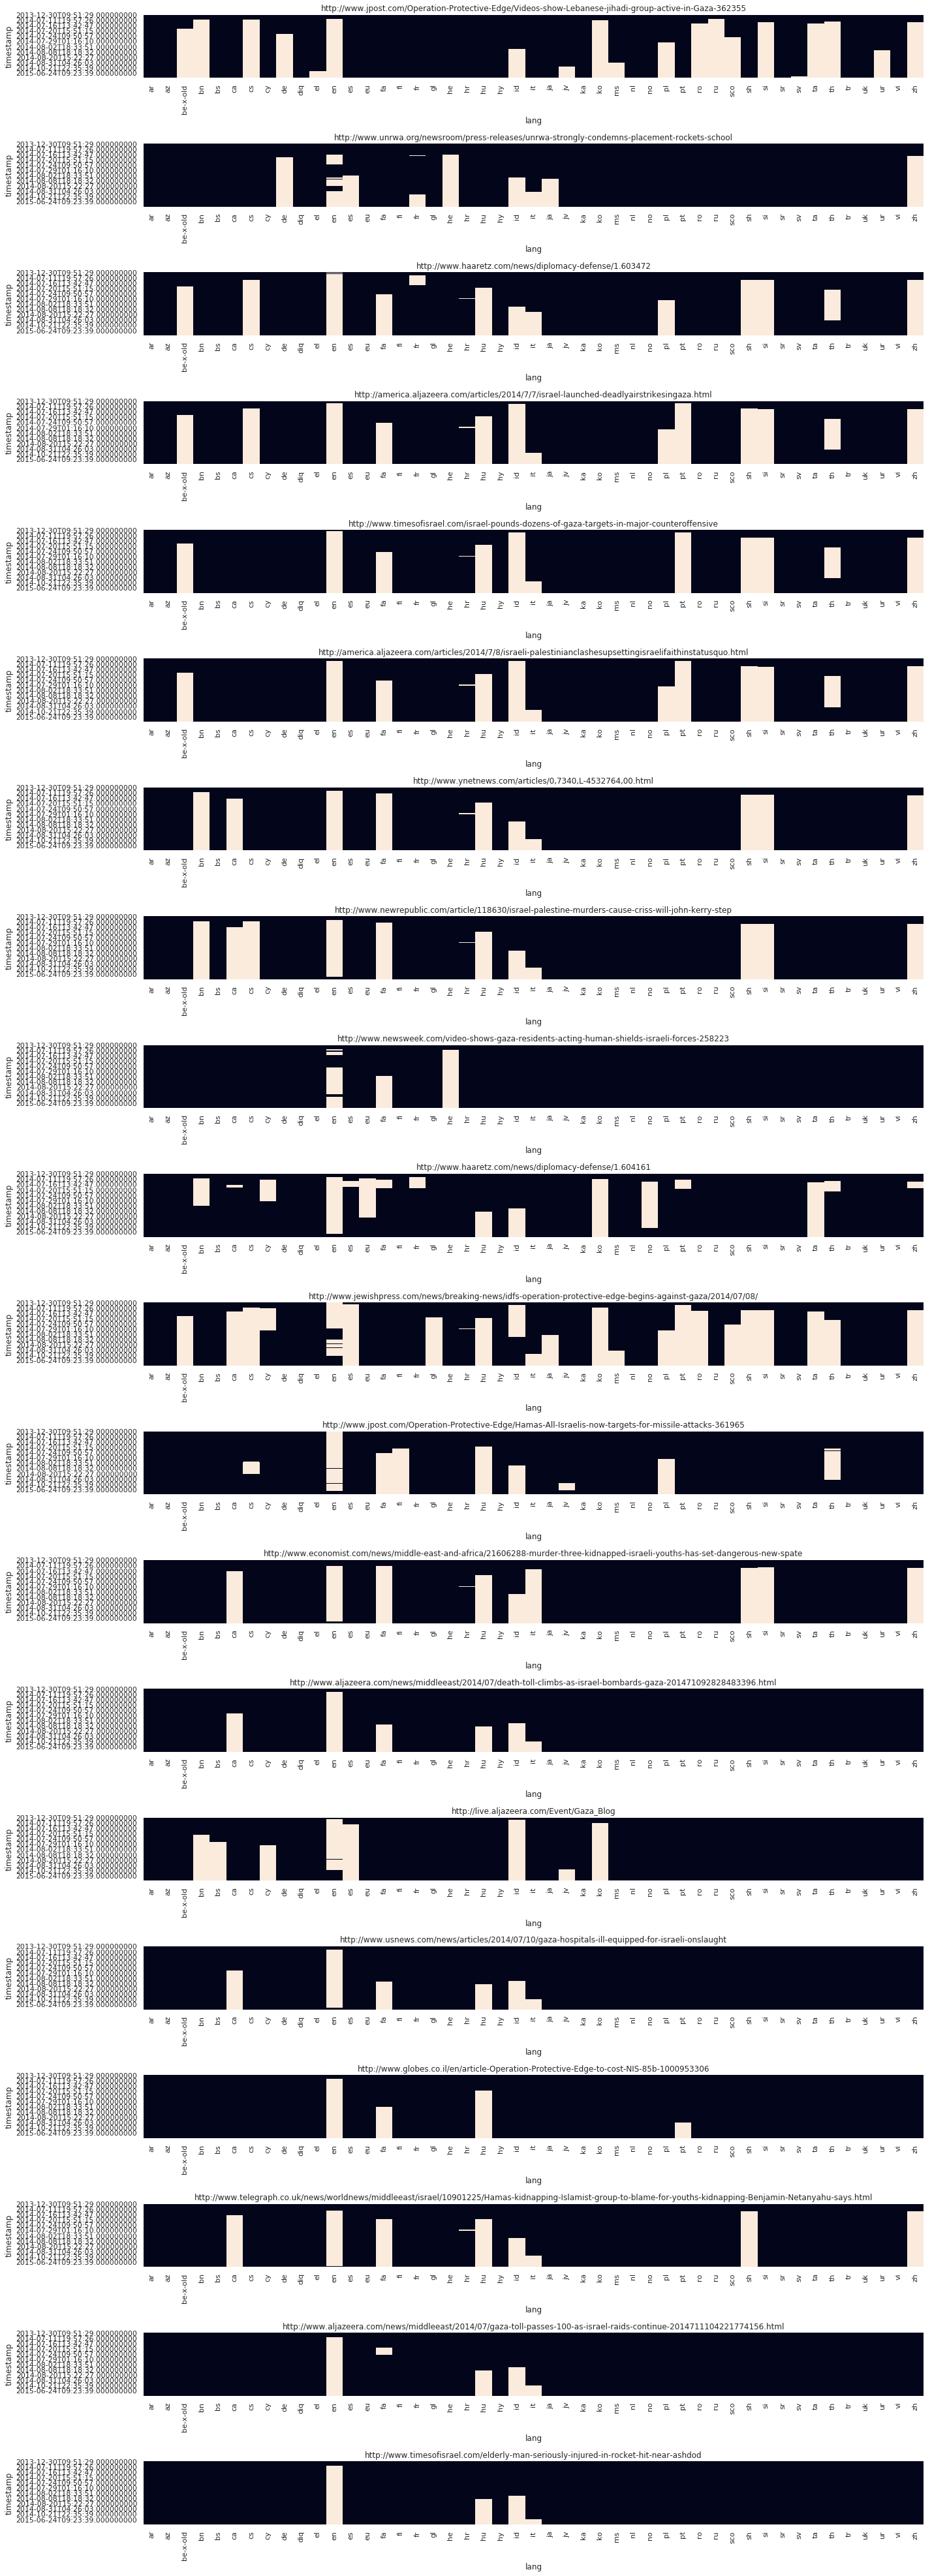

In [181]:
fig, axes = plt.subplots(nrows=20, figsize=(20,55))
for ax, l in zip(axes, list(frl.link.value_counts().head(20).index)):
    sns.heatmap(get_link_exists_df(frl, l), cbar=False, ax=ax).set_title(l)

plt.tight_layout()